In [1]:
import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

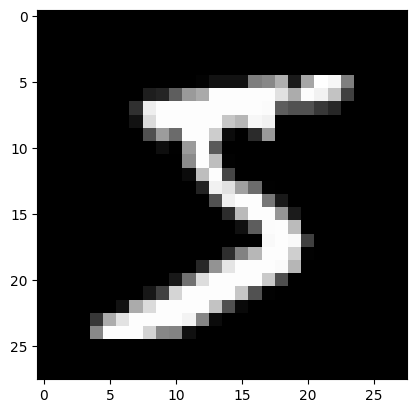

In [6]:
plt.imshow(single_image, cmap='gray')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
from keras.utils import to_categorical

In [10]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [11]:
len(y_cat_train)

60000

In [12]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [13]:
single_image.max()

255

In [14]:
x_train = x_train / x_train.max()

In [15]:
x_test = x_test / x_test.max()

In [16]:
scaled_image = x_train[0]

In [17]:
scaled_image.max()

1.0

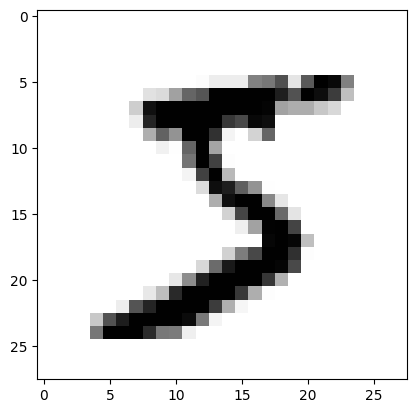

In [18]:
plt.imshow(scaled_image, cmap='gray_r')

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train = x_train.reshape(60000, 28, 28 ,1)

In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
x_test = x_test.reshape(10000, 28, 28 ,1)

In [23]:
import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [24]:
model = Sequential()

In [25]:
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=[keras.metrics.Accuracy()])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 7.1983e-06 - loss: 0.2988
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 6.1333e-04 - loss: 0.0501


In [28]:
model.metrics_names

['loss', 'compile_metrics']

In [29]:
model.evaluate(x_test, y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 5.0228e-04 - loss: 0.0488


[0.039184920489788055, 0.0005899997195228934]

In [30]:
from sklearn.metrics import classification_report

In [31]:
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.97      1.00      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

